<a href="https://colab.research.google.com/github/Elwing-Chou/summercamp/blob/main/11_%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 1.2MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=00427c9bde45b8d7e2910674eb8a096249d2f89da0a3f4eed85ddeb835b74440
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import pandas as pd
face_df = pd.read_csv("face.csv")
face_df

,Name,Encoding,Picture
0,林俊傑,"[-0.015528827905654907, 0.0415678545832634, 0....","[array([[165, 158, 165],\n [165, 158, 16..."
1,周杰倫,"[-0.078513965010643, 0.15060093998908997, 0.05...","[array([[59, 57, 71],\n [59, 57, 71],\n ..."
2,新垣結衣,"[-0.04756017029285431, 0.12196077406406403, 0....","[array([[240, 216, 216],\n [242, 218, 21..."
3,阿信,"[-0.06823480129241943, 0.06873072683811188, 0....","[array([[31, 17, 4],\n [32, 18, 5],\n ..."
4,長澤雅美,"[-0.06494396924972534, 0.03374582529067993, 0....","[array([[255, 255, 255],\n [255, 255, 25..."
5,林志玲,"[-0.04956519603729248, 0.02414611726999283, 0....","[array([[246, 242, 239],\n [245, 241, 23..."


In [ ]:
import numpy as np
encodings = []
for e in face_df["Encoding"]:
    encodings.append(np.array(eval(e)))
encodings = np.array(encodings)
labels = np.array(face_df["Name"])
labels

array(['林俊傑', '周杰倫', '新垣結衣', '阿信', '長澤雅美', '林志玲'], dtype=object)

請輸入網址:http://i8.bangqu.com/r2/news/20180311/30495732567a6c484d5a.jpg
跟 林俊傑 的距離: 0.60203348150294
跟 周杰倫 的距離: 0.7123774005387042
跟 新垣結衣 的距離: 0.5113527331777734
跟 阿信 的距離: 0.6184959549763757
跟 長澤雅美 的距離: 0.5317401700312043
跟 林志玲 的距離: 0.5530144123719636
沒有辨識到!!!


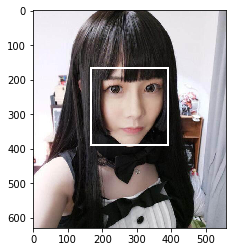

In [ ]:
import requests
from PIL import Image
import numpy as np
import face_recognition
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import math

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).convert("RGB")
img_np = np.array(img)
# face_recog
single_en = face_recognition.face_encodings(img_np)
single_loc = face_recognition.face_locations(img_np)

if len(single_en) == 0:
    print("沒有辨識到任何的臉")
elif len(single_en) > 1:
    print("不支援多臉辨識")
else:
    distance = face_recognition.face_distance(encodings, single_en[0])
    for l, d in zip(labels, distance):
        print("跟", l, "的距離:", d)
    if min(distance) < 0.5:
        idx = distance.argmin()
        print("這個應該是:", labels[idx])
    else:
        print("沒有辨識到!!!")
    (top, right, bottom, left) = single_loc[0]
    result = cv2.rectangle(img_np,
                           (left, top),
                           (right, bottom),
                           (255, 255, 255),
                           math.ceil(img.size[0] / 100))
    plt.imshow(result)

In [ ]:
img.size

(220, 217)